In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy
import math

In [2]:
#These are simply plots I made to explain why the two point method was used in the superlong runs

def ArrayRound(array, value):
    #For a 1-D array of values that are non-decreasing everywhere. Returns the element of the array closest to the value given
    inf = -1
    sup = -1
    if array[0] >= value:
        return array[0]
    else:
        for number in array:
            if number <= value:
                inf = number
        if inf == value:
            return value
        else:
            sup = array[np.where(array == inf)[0] +1]
            if abs(inf - value) < abs(sup - value):
                return inf
            elif abs(inf-value) > abs(sup - value):
                return sup
            else:
                print("The closest the value provided is exactly in between two elements of the array, the lower element has been returned.")
                return inf
            
def DayLineFit(time_data, y_data, start):
    #Fits lines on points 24 hours apart. Assuming the time data is in seconds, takes into account any binning done
    #Assumes time_data points are equally spaced; hence the the difference variable
    step = ArrayRound(time_data, start)
    difference = time_data[1] - time_data[0]
    day = int(round(2 * np.pi/difference,0))
    slopes = np.array([])
    intercepts = np.array([])
    while step + (2 *np.pi) < time_data[-1]:
        x = np.array([step, step + (day*difference)])
        y = np.array([y_data[np.where(time_data == step)[0]], y_data[np.where(time_data == step + (day*difference))[0]]])
        z = np.polyfit(x,y,1)
        slopes = np.append(slopes, z[0])
        intercepts = np.append(intercepts, z[1])
        step = time_data[np.where(time_data == step)[0][0] +1]
    return slopes, intercepts

def twoPoint(x,y):
    period = 2 * np.pi
    t = 0
    slopes = np.array([])
    intercepts = np.array([])
    while t < len(x):
        x1 = x[t]
        x2 = ArrayRound(x, x[t] + period)
        X = [x1, x2]
        Y = [y[np.where(x == x1)[0]], y[np.where(x == x2)[0]]]
        Z = np.polyfit(X,Y,1)
        slopes = np.append(slopes, Z[0])
        intercepts = np.append(intercepts, Z[1])
        t +=1
        return np.average(slopes), np.average(intercepts)

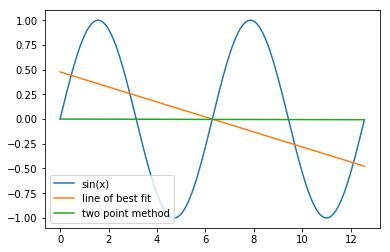

In [3]:
x = np.arange(0, 4 * np.pi, 0.01)
sine = np.sin(x)
#ax + b
a, b = np.polyfit(x, sine, 1)
#Ax + B
A, B = twoPoint(x, sine)

plt.plot(x, sine, label = "sin(x)")
plt.plot(x, np.polyval([a,b], x), label = "line of best fit")
plt.plot(x, np.polyval([A,B], x), label = "two point method")
plt.legend()
plt.show()

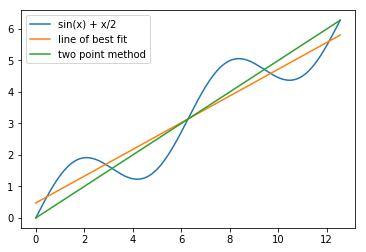

In [4]:
x = np.arange(0, 4 * np.pi, 0.01)
sine = np.sin(x) + x/2
#ax + b
a, b = np.polyfit(x, sine, 1)
#Ax + B
A, B = twoPoint(x, sine)

plt.plot(x, sine, label = "sin(x) + x/2")
plt.plot(x, np.polyval([a,b], x), label = "line of best fit")
plt.plot(x, np.polyval([A,B], x), label = "two point method")
plt.legend()
plt.show()

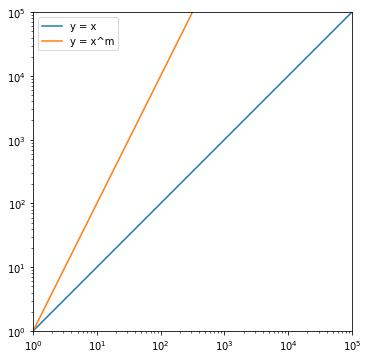

In [21]:
m = 2
x = np.logspace(-3,5,100)
y1 = x
y2 = x**m

fig, axs = plt.subplots(1, 1, constrained_layout=True)
fig.set_figheight(5)
fig.set_figwidth(5)
axs.plot(x,y1, label = "y = x")
axs.plot(x,y2, label = "y = x^m")
axs.legend()
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlim(1, x[-1])
axs.set_ylim(1, x[-1])
axs.set_aspect('equal')